In [1]:
import pandas as pd
import fuzzywuzzy as fw
from fuzzywuzzy import process
import chardet
from datetime import datetime

# Read in CSV File
First, attempt using UTF-8 (which is the standard format)

In [2]:
suicide_attacks = pd.read_csv("PakistanSuicideAttacks.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 0: invalid start byte

Now, check to see what the file encoding is ....

In [3]:
with open("PakistanSuicideAttacks.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [4]:
suicide_attacks = pd.read_csv("PakistanSuicideAttacks.csv", encoding='Windows-1252')

Start exploring the data:

In [5]:
suicide_attacks.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [6]:
suicide_attacks.shape

(496, 26)

In [7]:
suicide_attacks.dtypes

S#                           int64
Date                        object
Islamic Date                object
Blast Day Type              object
Holiday Type                object
Time                        object
City                        object
Latitude                   float64
Longitude                   object
Province                    object
Location                    object
Location Category           object
Location Sensitivity        object
Open/Closed Space           object
Influencing Event/Event     object
Target Type                 object
Targeted Sect if any        object
Killed Min                 float64
Killed Max                 float64
Injured Min                float64
Injured Max                 object
No. of Suicide Blasts      float64
Explosive Weight (max)      object
Hospital Names              object
Temperature(C)             float64
Temperature(F)             float64
dtype: object

In [8]:
print(suicide_attacks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
S#                         496 non-null int64
Date                       496 non-null object
Islamic Date               342 non-null object
Blast Day Type             486 non-null object
Holiday Type               72 non-null object
Time                       285 non-null object
City                       496 non-null object
Latitude                   493 non-null float64
Longitude                  493 non-null object
Province                   496 non-null object
Location                   493 non-null object
Location Category          461 non-null object
Location Sensitivity       460 non-null object
Open/Closed Space          461 non-null object
Influencing Event/Event    191 non-null object
Target Type                470 non-null object
Targeted Sect if any       448 non-null object
Killed Min                 350 non-null float64
Killed Max                 480 non-null float64
I

In [9]:
suicide_attacks.describe()

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [10]:
suicide_attacks.describe(include=['object', 'bool'])

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Injured Max,Explosive Weight (max),Hospital Names
count,496,342,486,72,285,496,493,496,493,461,460,461,191,470,448,464,172,297
unique,455,307,3,15,215,93,100,9,487,25,4,6,173,24,8,91,114,239
top,Wednesday-Feb-15-2017,19 Jumada al-awwal 1438 A.H,Working Day,Weekend,Evening,Peshawar,71.5448,KPK,Imambargah,Police,High,Open,Sectarian strife,Military,None,2,6kg,Lady Reading Hospital
freq,3,3,403,45,12,72,71,251,3,92,264,321,7,116,351,20,8,20


In [11]:
suicide_attacks['Longitude'] =pd.to_numeric(suicide_attacks['Longitude'])

ValueError: Unable to parse string " 71.456944" at position 478

In [12]:
suicide_attacks['Longitude'] = suicide_attacks['Longitude'].str.strip()
suicide_attacks['Longitude'] =pd.to_numeric(suicide_attacks['Longitude'])
suicide_attacks.dtypes

S#                           int64
Date                        object
Islamic Date                object
Blast Day Type              object
Holiday Type                object
Time                        object
City                        object
Latitude                   float64
Longitude                  float64
Province                    object
Location                    object
Location Category           object
Location Sensitivity        object
Open/Closed Space           object
Influencing Event/Event     object
Target Type                 object
Targeted Sect if any        object
Killed Min                 float64
Killed Max                 float64
Injured Min                float64
Injured Max                 object
No. of Suicide Blasts      float64
Explosive Weight (max)      object
Hospital Names              object
Temperature(C)             float64
Temperature(F)             float64
dtype: object

In [13]:
suicide_attacks.describe()

,S#,Latitude,Longitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,70.995388,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,2.022427,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,62.350000,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,70.145600,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,71.524900,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,72.366700,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,74.572900,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [14]:
cities = suicide_attacks['City'].unique()
cities.sort()
print(cities)
print(len(cities))

['ATTOCK' 'Attock ' 'Bajaur Agency' 'Bannu' 'Bhakkar ' 'Buner' 'Chakwal '
 'Chaman' 'Charsadda' 'Charsadda ' 'D. I Khan' 'D.G Khan' 'D.G Khan '
 'D.I Khan' 'D.I Khan ' 'Dara Adam Khel' 'Dara Adam khel' 'Fateh Jang'
 'Ghallanai, Mohmand Agency ' 'Gujrat' 'Hangu' 'Haripur' 'Hayatabad'
 'Islamabad' 'Islamabad ' 'Jacobabad' 'KURRAM AGENCY' 'Karachi' 'Karachi '
 'Karak' 'Khanewal' 'Khuzdar' 'Khyber Agency' 'Khyber Agency ' 'Kohat'
 'Kohat ' 'Kuram Agency ' 'Lahore' 'Lahore ' 'Lakki Marwat' 'Lakki marwat'
 'Lasbela' 'Lower Dir' 'MULTAN' 'Malakand ' 'Mansehra' 'Mardan'
 'Mohmand Agency' 'Mohmand Agency ' 'Mohmand agency'
 'Mosal Kor, Mohmand Agency' 'Multan' 'Muzaffarabad' 'North Waziristan'
 'North waziristan' 'Nowshehra' 'Orakzai Agency' 'Peshawar' 'Peshawar '
 'Pishin' 'Poonch' 'Quetta' 'Quetta ' 'Rawalpindi' 'Sargodha'
 'Sehwan town' 'Shabqadar-Charsadda' 'Shangla ' 'Shikarpur' 'Sialkot'
 'South Waziristan' 'South waziristan' 'Sudhanoti' 'Sukkur' 'Swabi '
 'Swat' 'Swat ' 'Taftan' 'Tangi, 

In [15]:
sorted(cities, key=lambda s: s.casefold())

['ATTOCK',
 'Attock ',
 'Bajaur Agency',
 'Bannu',
 'bannu',
 'Bhakkar ',
 'Buner',
 'Chakwal ',
 'Chaman',
 'Charsadda',
 'Charsadda ',
 'D. I Khan',
 'D.G Khan',
 'D.G Khan ',
 'D.I Khan',
 'D.I Khan ',
 'Dara Adam Khel',
 'Dara Adam khel',
 'Fateh Jang',
 'Ghallanai, Mohmand Agency ',
 'Gujrat',
 'Hangu',
 'Haripur',
 'Hayatabad',
 'Islamabad',
 'Islamabad ',
 'Jacobabad',
 'Karachi',
 'karachi',
 'Karachi ',
 'karachi ',
 'Karak',
 'Khanewal',
 'Khuzdar',
 'Khyber Agency',
 'Khyber Agency ',
 'Kohat',
 'Kohat ',
 'Kuram Agency ',
 'KURRAM AGENCY',
 'Lahore',
 'Lahore ',
 'Lakki Marwat',
 'Lakki marwat',
 'lakki marwat',
 'Lasbela',
 'Lower Dir',
 'Malakand ',
 'Mansehra',
 'Mardan',
 'Mohmand Agency',
 'Mohmand agency',
 'Mohmand Agency ',
 'Mosal Kor, Mohmand Agency',
 'MULTAN',
 'Multan',
 'Muzaffarabad',
 'North Waziristan',
 'North waziristan',
 'Nowshehra',
 'Orakzai Agency',
 'Peshawar',
 'peshawar',
 'Peshawar ',
 'Pishin',
 'Poonch',
 'Quetta',
 'Quetta ',
 'Rawalpindi',
 '

In [16]:
citiesCounts =  suicide_attacks['City'].value_counts()
print(citiesCounts.sort_index())

ATTOCK                         1
Attock                         3
Bajaur Agency                 13
Bannu                         22
Bhakkar                        1
Buner                          4
Chakwal                        2
Chaman                         2
Charsadda                      7
Charsadda                      2
D. I Khan                      1
D.G Khan                       1
D.G Khan                       3
D.I Khan                       8
D.I Khan                       4
Dara Adam Khel                 3
Dara Adam khel                 3
Fateh Jang                     1
Ghallanai, Mohmand Agency      1
Gujrat                         2
Hangu                         17
Haripur                        1
Hayatabad                      1
Islamabad                     17
Islamabad                      3
Jacobabad                      1
KURRAM AGENCY                  1
Karachi                       21
Karachi                        6
Karak                          1
          

In [18]:
%matplotlib inline

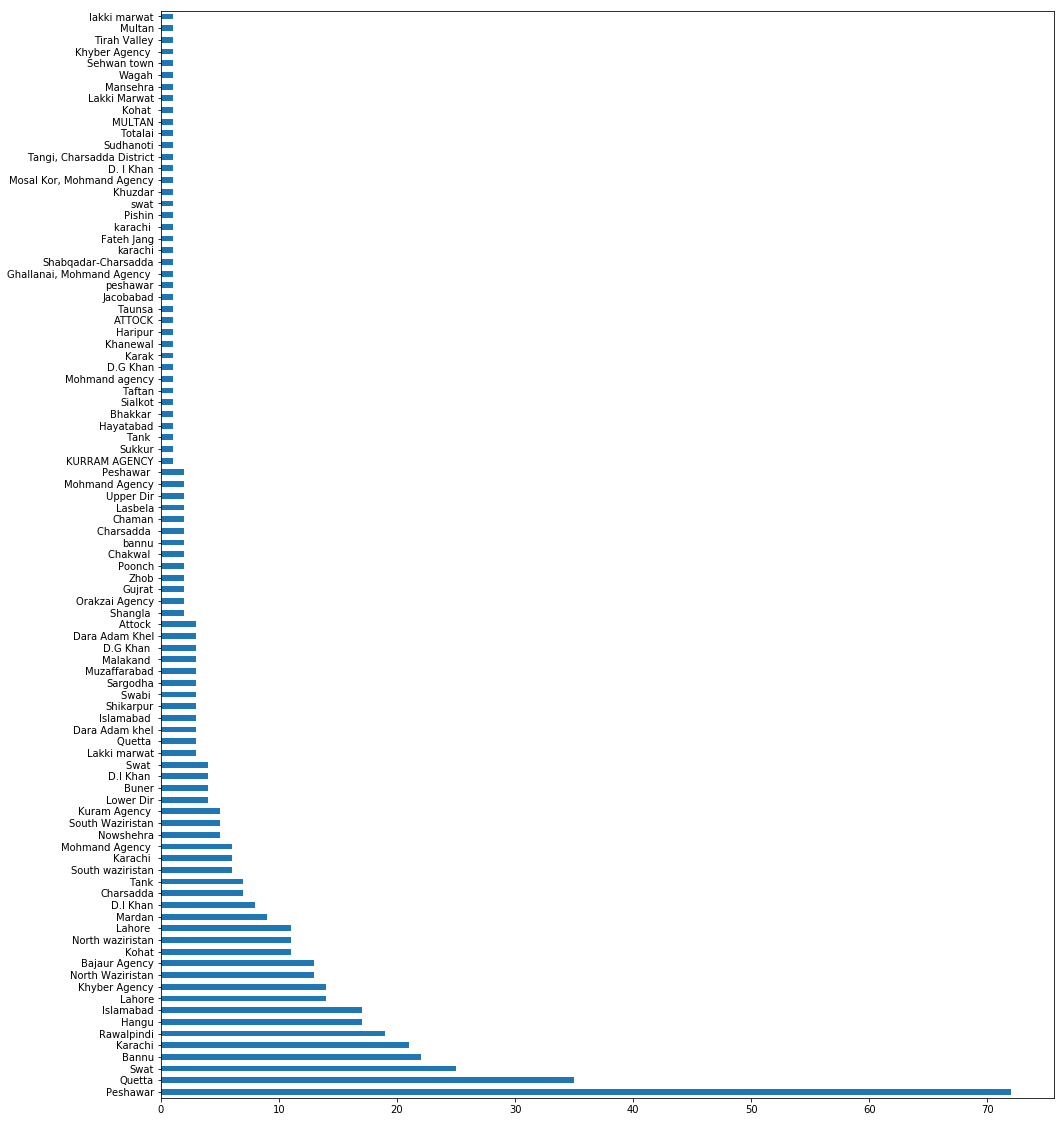

In [19]:
citiesCounts.plot(kind='barh',figsize=[16,20])

In [20]:
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()
citiesCounts2 =  suicide_attacks['City'].value_counts()
print(citiesCounts2.sort_index())

attock                        4
bajaur agency                13
bannu                        24
bhakkar                       1
buner                         4
chakwal                       2
chaman                        2
charsadda                     9
d. i khan                     1
d.g khan                      4
d.i khan                     12
dara adam khel                6
fateh jang                    1
ghallanai, mohmand agency     1
gujrat                        2
hangu                        17
haripur                       1
hayatabad                     1
islamabad                    20
jacobabad                     1
karachi                      29
karak                         1
khanewal                      1
khuzdar                       1
khyber agency                15
kohat                        12
kuram agency                  5
kurram agency                 1
lahore                       25
lakki marwat                  5
                             ..
multan  

In [21]:
cities =  suicide_attacks['City'].unique()
matches = fw.process.extract("d.i khan", cities, limit=10, scorer=fw.fuzz.token_sort_ratio)
print(*matches, sep=',\n')

('d.i khan', 100),
('d. i khan', 100),
('d.g khan', 88),
('khanewal', 50),
('sudhanoti', 47),
('kohat', 46),
('hangu', 46),
('dara adam khel', 45),
('mardan', 43),
('pishin', 43)


In [22]:
citiesCounts =  suicide_attacks['City'].value_counts().sort_values(ascending=False);
for city, count in citiesCounts.items():
    matches = fw.process.extract(city, cities, limit=10, scorer=fw.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= 90]
    if (len(close_matches)>1):
        print (close_matches)
        # get the rows of all the close matches in our dataframe
        rows_with_matches = suicide_attacks['City'].isin(close_matches)
        suicide_attacks.loc[rows_with_matches,'City'] = city;

['d.i khan', 'd. i khan']
['kuram agency', 'kurram agency']
['kurram agency', 'kuram agency']
['d.i khan', 'd. i khan']


In [23]:
citiesCounts3 =  suicide_attacks['City'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(citiesCounts3.sort_index())
print("Number of cities: {}".format(len(citiesCounts3)))

attock                        4
bajaur agency                13
bannu                        24
bhakkar                       1
buner                         4
chakwal                       2
chaman                        2
charsadda                     9
d. i khan                    13
d.g khan                      4
dara adam khel                6
fateh jang                    1
ghallanai, mohmand agency     1
gujrat                        2
hangu                        17
haripur                       1
hayatabad                     1
islamabad                    20
jacobabad                     1
karachi                      29
karak                         1
khanewal                      1
khuzdar                       1
khyber agency                15
kohat                        12
kurram agency                 6
lahore                       25
lakki marwat                  5
lasbela                       2
lower dir                     4
malakand                      3
mansehra

In [25]:
def replace_close_matches(df, column, min_ratio=90):
    columnCounts = df[column].value_counts().sort_values(ascending=False);
    for index,count in columnCounts.items():
        matches = fw.process.extract(index, columnCounts.index, limit=10, scorer=fw.fuzz.token_sort_ratio)
        close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
        if (len(close_matches)>1):
            rows_with_matches = df[column].isin(close_matches)
            df.loc[rows_with_matches,column] = index;

In [ ]:
suicide_attacks = pd.read_csv("PakistanSuicideAttacks.csv", encoding='Windows-1252')
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()
# replace any closely match values in city
replace_close_matches(suicide_attacks,'City')

In [ ]:
citiesCounts3 =  suicide_attacks['City'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(citiesCounts3.sort_index())
print("Number of cities: {}".format(len(citiesCounts3)))

In [ ]:
suicide_attacks.to_csv("PakistanSuicideAttacks_citesCleaned.csv")

In [ ]:
suicide_attacks

In [26]:
provinceCounts =  suicide_attacks['Province'].value_counts()
print(provinceCounts.sort_index())
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
# remove trailing white spaces
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()
provinceCounts =  suicide_attacks['Province'].value_counts()
print(provinceCounts.sort_index())
replace_close_matches(suicide_attacks,'Province')
provinceCounts =  suicide_attacks['Province'].value_counts()
print(provinceCounts.sort_index())

AJK              6
Balochistan     16
Baluchistan     31
Capital         20
FATA            70
Fata             3
KPK            251
Punjab          64
Sindh           35
Name: Province, dtype: int64
ajk              6
balochistan     16
baluchistan     31
capital         20
fata            73
kpk            251
punjab          64
sindh           35
Name: Province, dtype: int64
ajk              6
balochistan     47
capital         20
fata            73
kpk            251
punjab          64
sindh           35
Name: Province, dtype: int64


https://en.wikipedia.org/wiki/Administrative_units_of_Pakistan

In [27]:
suicide_attacks['Date'].describe()

count                       496
unique                      455
top       Wednesday-Feb-15-2017
freq                          3
Name: Date, dtype: object

In [28]:
suicide_attacks['Date'] =suicide_attacks['Date'].apply(lambda x: x[x.find('-')+1:].replace('-',' ').replace(',',' '))
suicide_attacks['Date']

0      November 19 1995
1       November 6 2000
2            May 8 2002
3          June 14 2002
4           July 4 2003
5      December 25 2003
6      February 28 2004
7            May 7 2004
8           May 31 2004
9           June 3 2004
10         July 28 2004
11         July 30 2004
12       October 1 2004
13      October 10 2004
14        March 19 2005
15        April 28 2005
16          May 27 2005
17          May 30 2005
18      February 9 2006
19         March 2 2006
20        April 12 2006
21          June 2 2006
22         June 26 2006
23        August 6 2006
24      November 8 2006
25     November 17 2006
26      December 3 2006
27      January 22 2007
28      January 26 2007
29      January 27 2007
             ...       
466         Apr 19 2016
467         May 30 2016
468         Aug 08 2016
469         Sep 02 2016
470         Sep 13 2016
471         Sep 16 2016
472         Oct 25 2016
473         Nov 12 2016
474         Nov 26 2016
475          Feb 7 2017
476         Feb 

In [29]:
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Jan ','January ').replace('Feb ', 'February ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Mar ','March ').replace('Apr ', 'April ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Jun ','June ').replace('Jul ', 'July ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Aug ','August ').replace('Sep ', 'September ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Oct ','October ').replace('Nov ', 'November ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Dec ','December ') )

suicide_attacks['Date']

0       November 19 1995
1        November 6 2000
2             May 8 2002
3           June 14 2002
4            July 4 2003
5       December 25 2003
6       February 28 2004
7             May 7 2004
8            May 31 2004
9            June 3 2004
10          July 28 2004
11          July 30 2004
12        October 1 2004
13       October 10 2004
14         March 19 2005
15         April 28 2005
16           May 27 2005
17           May 30 2005
18       February 9 2006
19          March 2 2006
20         April 12 2006
21           June 2 2006
22          June 26 2006
23         August 6 2006
24       November 8 2006
25      November 17 2006
26       December 3 2006
27       January 22 2007
28       January 26 2007
29       January 27 2007
             ...        
466        April 19 2016
467          May 30 2016
468       August 08 2016
469    September 02 2016
470    September 13 2016
471    September 16 2016
472      October 25 2016
473     November 12 2016
474     November 26 2016


In [30]:
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: datetime.strptime(x,'%B %d %Y') )

suicide_attacks['Date']

0     1995-11-19
1     2000-11-06
2     2002-05-08
3     2002-06-14
4     2003-07-04
5     2003-12-25
6     2004-02-28
7     2004-05-07
8     2004-05-31
9     2004-06-03
10    2004-07-28
11    2004-07-30
12    2004-10-01
13    2004-10-10
14    2005-03-19
15    2005-04-28
16    2005-05-27
17    2005-05-30
18    2006-02-09
19    2006-03-02
20    2006-04-12
21    2006-06-02
22    2006-06-26
23    2006-08-06
24    2006-11-08
25    2006-11-17
26    2006-12-03
27    2007-01-22
28    2007-01-26
29    2007-01-27
         ...    
466   2016-04-19
467   2016-05-30
468   2016-08-08
469   2016-09-02
470   2016-09-13
471   2016-09-16
472   2016-10-25
473   2016-11-12
474   2016-11-26
475   2017-02-07
476   2017-02-13
477   2017-02-15
478   2017-02-15
479   2017-02-15
480   2017-02-16
481   2017-02-21
482   2017-04-05
483   2017-05-12
484   2017-05-20
485   2017-06-23
486   2017-07-10
487   2017-07-17
488   2017-07-17
489   2017-07-24
490   2017-08-12
491   2017-10-05
492   2017-10-19
493   2017-11-

In [31]:
suicide_attacks.dtypes

S#                                  int64
Date                       datetime64[ns]
Islamic Date                       object
Blast Day Type                     object
Holiday Type                       object
Time                               object
City                               object
Latitude                          float64
Longitude                         float64
Province                           object
Location                           object
Location Category                  object
Location Sensitivity               object
Open/Closed Space                  object
Influencing Event/Event            object
Target Type                        object
Targeted Sect if any               object
Killed Min                        float64
Killed Max                        float64
Injured Min                       float64
Injured Max                        object
No. of Suicide Blasts             float64
Explosive Weight (max)             object
Hospital Names                    